In [298]:
import mplhep as hep
import matplotlib.pyplot as plt
from wremnants.datasets.datagroups import datagroups2016
from wremnants import boostHistHelpers as hh
from wremnants import plotTools,syst_tools
from wremnants import histselections as sel
import hist
import narf
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2

In [505]:
groups = datagroups2016("../mw_with_mu_eta_pt.pkl.lz4")


In [506]:
# This is for reading groups
procDict = groups.datagroupsForHist("nominal", label="nominal", procsToRead=["Wmunu"])
procDict = groups.datagroupsForHist("muonScaleSyst", label="muonScaleSyst", procsToRead=["Wmunu"])

In [515]:
procDict["Wmunu"]["muonScaleSyst"][{"downUpVar" : 1, "scaleEtaSlice" : 1.j}]

Hist(
  Regular(48, -2.4, 2.4, name='eta', label='eta'),
  Regular(29, 26, 55, name='pt', label='pt'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='charge', label='charge'),
  storage=Weight()) # Sum: WeightedSum(value=9.68439e+07, variance=7.67098e+07)

In [514]:
procDict["Wmunu"]["nominal"]

Hist(
  Regular(48, -2.4, 2.4, name='eta', label='eta'),
  Regular(29, 26, 55, name='pt', label='pt'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='charge', label='charge'),
  storage=Weight()) # Sum: WeightedSum(value=9.68424e+07, variance=7.6705e+07)

In [508]:
hscaleUp = procDict["Wmunu"]["muonScaleSyst"][{"downUpVar" : 1, "scaleEtaSlice" : 1.j}]
hscaleDown = procDict["Wmunu"]["muonScaleSyst"][{"downUpVar" : 0, "scaleEtaSlice" : 1.j}]

In [516]:
hnom = procDict["Wmunu"]["nominal"]
# Can also read specific samples by accessing the original 
hnomminus = groups.results["WminusmunuPostVFP"]["output"]["nominal"]

In [ ]:
hscaleUp.project("pt").plot()

(0.995, 1.005)

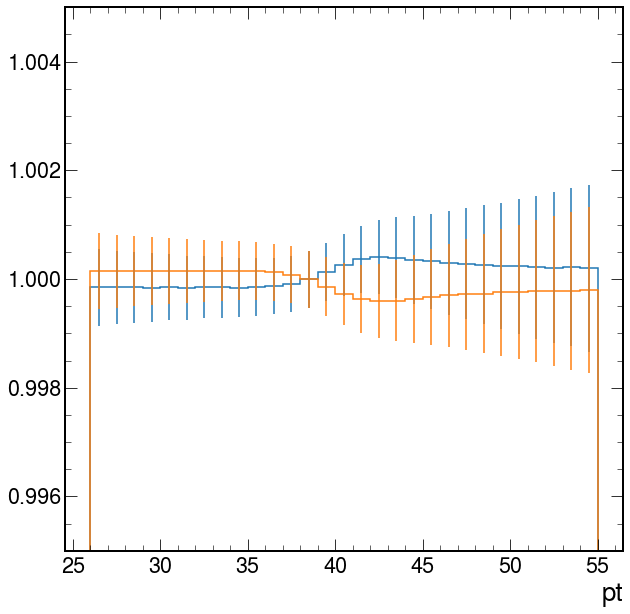

In [519]:
hh.divideHists(hscaleUp.project("pt"), hnom.project("pt")).plot()
hh.divideHists(hscaleDown.project("pt"), hnom.project("pt")).plot()
plt.ylim([0.995, 1.005])

In [520]:
combine = datagroups2016("../temp/WMassCombineInput.root")

In [525]:
procs = combine.datagroupsForHist("x_Wmunu_plus", label="nominal")
procs = combine.datagroupsForHist("x_Wmunu_CMS_scale_m_ieta0Up_plus", label="scaleEta0Up")
procs = combine.datagroupsForHist("x_Wmunu_CMS_scale_m_ieta0Down_plus", label="scaleEta0Down")
procs = combine.datagroupsForHist("x_Wmunu_pdf1NNPDF31Up_plus", label="pdf1Up")
procs = combine.datagroupsForHist("x_Wmunu_pdf1NNPDF31Down_plus", label="pdf1Down")

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f7964acd3c0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f796dfdbd90>, text=[])

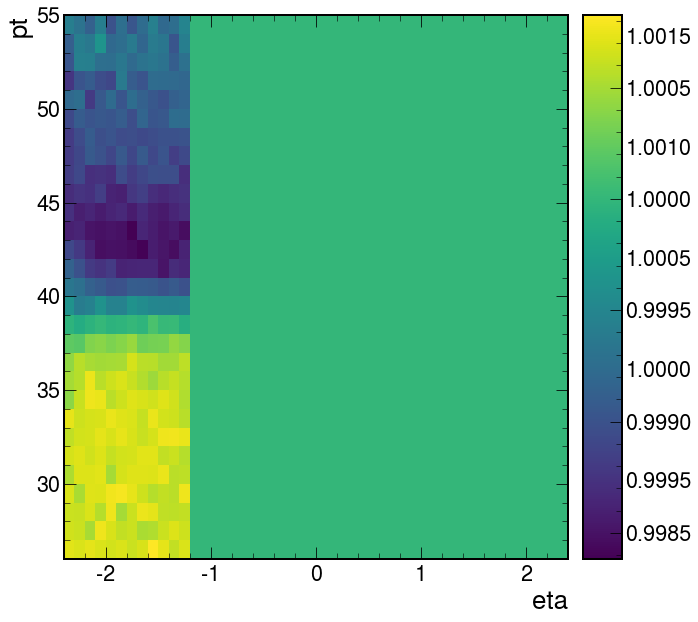

In [513]:
hh.divideHists(procs["Wmunu"]["scaleEta0Up"], procs["Wmunu"]["nominal"]).plot()
hh.divideHists(procs["Wmunu"]["scaleEta0Down"], procs["Wmunu"]["nominal"]).plot()
#plt.ylim([0.99, 1.01])

In [527]:
hmirror = hh.mirrorHist(hnom, procs["Wmunu"]["pdf1Up"])

hnew is WeightedSum(value=7.57741e+07, variance=4.32538e+08)


(0.99, 1.01)

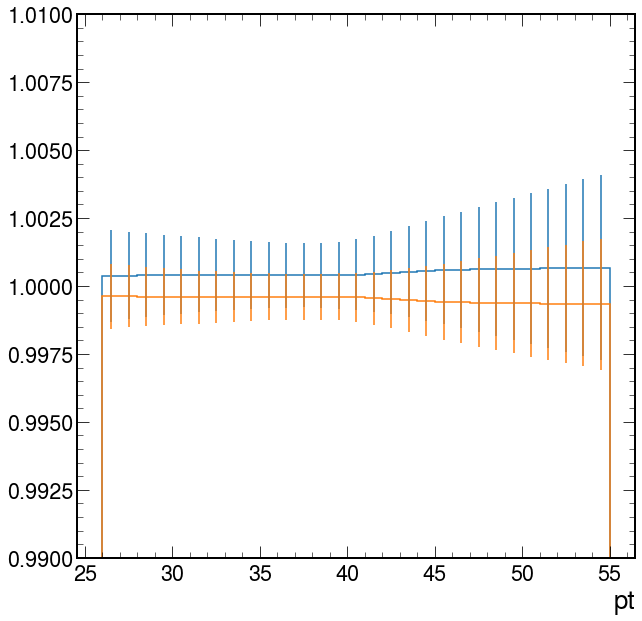

In [531]:
hh.divideHists(procs["Wmunu"]["pdf1Up"].project("pt"),procs["Wmunu"]["nominal"].project("pt")).plot()
hh.divideHists(procs["Wmunu"]["pdf1Down"].project("pt"),procs["Wmunu"]["nominal"].project("pt")).plot()
plt.ylim([0.99, 1.01])

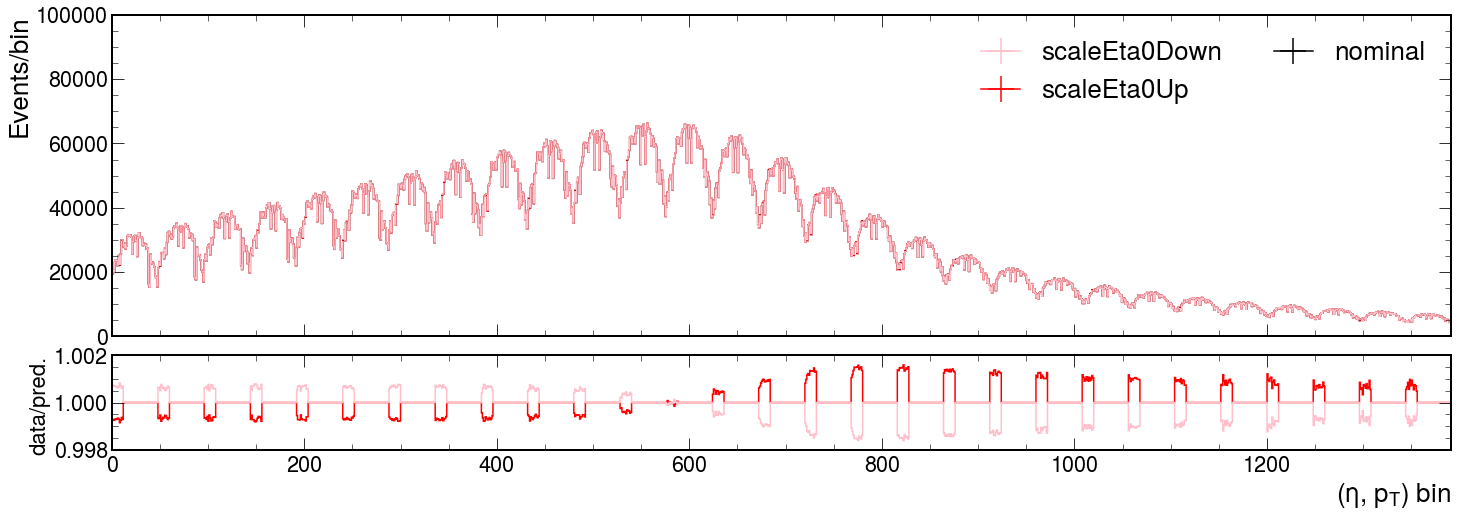

In [532]:
hists = [sel.unrolledHist(h) for h in [procs["Wmunu"]["nominal"], procs["Wmunu"]["scaleEta0Up"], procs["Wmunu"]["scaleEta0Down"]]]
#hists = [h.project("pt") for h in [procs["Wmunu"]["nominal"], procs["Wmunu"]["pdf1Up"], procs["Wmunu"]["pdf1Down"]]]
colors = ["black", "red", "pink"]
labels = ["nominal", "scaleEta0Up", "scaleEta0Down"]

fig = plotTools.makePlotsWithRatioToRef(hists, labels, colors, xlabel=r"($\eta$, p$_{T}$) bin", scale=1e5,rrange=[0.998, 1.002])


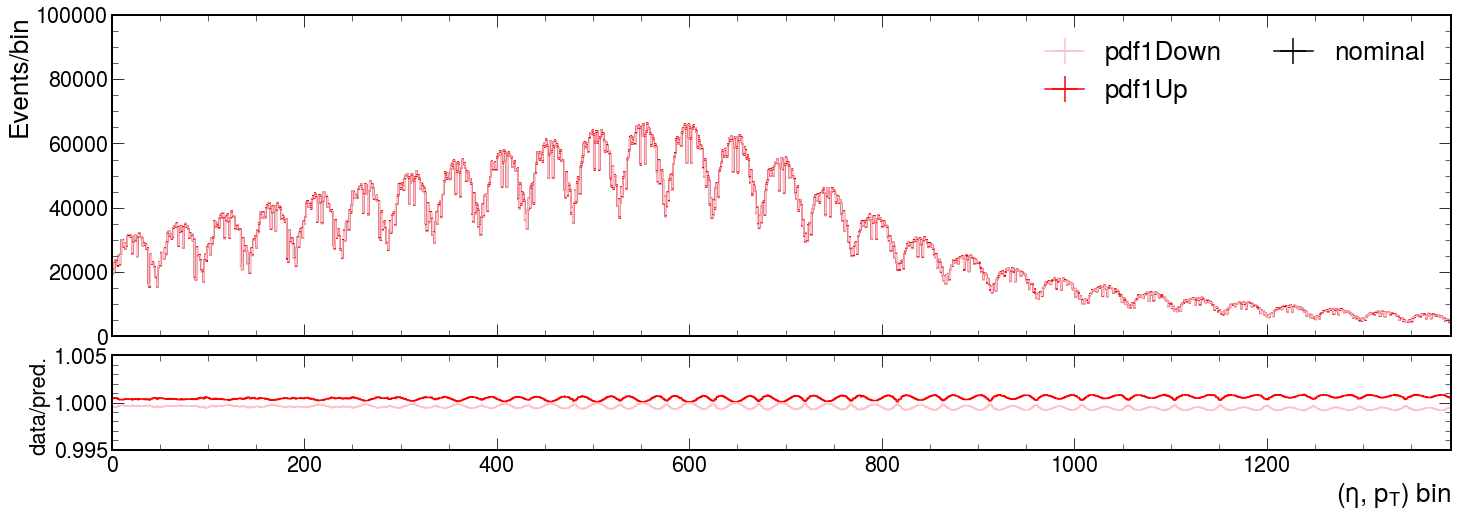

In [533]:
hists = [sel.unrolledHist(h) for h in [procs["Wmunu"]["nominal"], procs["Wmunu"]["pdf1Up"], procs["Wmunu"]["pdf1Down"]]]
colors = ["black", "red", "pink"]
labels = ["nominal", "pdf1Up", "pdf1Down"]

fig = plotTools.makePlotsWithRatioToRef(hists, labels, colors, xlabel=r"($\eta$, p$_{T}$) bin", scale=1e5,rrange=[0.995, 1.005])


In [534]:
histInfo = groups.datagroupsForHist("qcdScaleByHelicity", selectSignal=True, label="qcdScaleByHelicity", procsToRead=["Wmunu"])

In [537]:
histInfo["Wmunu"]["qcdScaleByHelicitySum"] = syst_tools.scale_helicity_hist_to_variations(histInfo["Wmunu"]["qcdScaleByHelicity"])

In [538]:
s = hist.tag.Slicer()
hVarNom = histInfo["Wmunu"]["qcdScaleByHelicity"][{"ptVgen" : s[::hist.sum], "chargeVgen" : s[::hist.sum], "helicity" : s[::hist.sum], "muRfact" : s[1.j], "muFfact" : s[1.j] }]


In [539]:
selections = [{"muRfact" : j, "muFfact" : j, "helicity" : i, "ptVgen" : 0, "chargeVgen" : 0} for i in range(2) for j in [0,1,2]]

In [540]:
hists = [sel.unrolledHist(histInfo["Wmunu"]["nominal"])]
hists.append(sel.unrolledHist(hVarNom))
hists.extend([sel.unrolledHist(histInfo["Wmunu"]["qcdScaleByHelicitySum"][s]) for s in selections])

In [541]:
labels = ["nominal", "varNom","sumNom"]+["test%i" % i for i in range(5)]
colors = ["black", "blue", "red", "lightgreen", "green", "pink", "orange", "lightblue"]

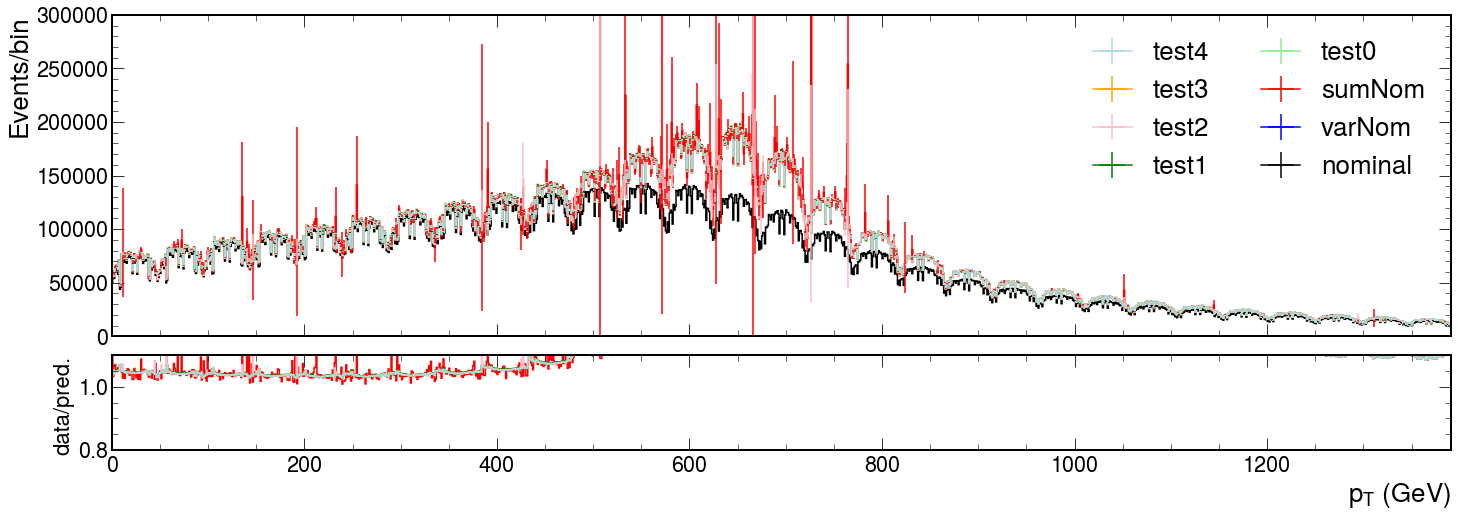

In [544]:
fig = plotTools.makePlotsWithRatioToRef(hists, labels, colors, xlabel=r"p$_{T}$ (GeV)", scale=3e5,rrange=[0.8, 1.1])

In [545]:
print(histInfo["Wmunu"]["nominal"].sum(flow=True))
print(histInfo["Wmunu"]["qcdScaleByHelicity"][{"muRfact" :1.j, "muFfact" : 1.j}].sum(flow=True))

WeightedSum(value=9.68424e+07, variance=7.6705e+07)
WeightedSum(value=1.12406e+08, variance=1.33627e+08)
